In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy as sp
from scipy import stats
from pandas import Series
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm
import statsmodels.api as sm

__Question 1-1__

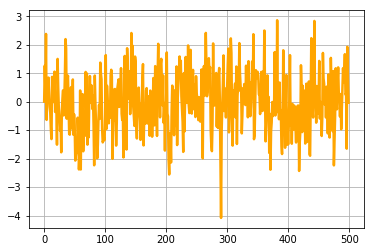

In [3]:
T = 500
phi = 0.25
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_phi25 = pd.Series(y)
y_phi25.plot(grid=True, color="orange", linewidth=2.5)

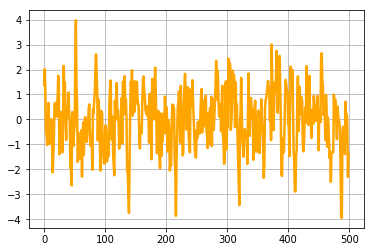

In [4]:
T = 500
phi = 0.5
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_phi50 = pd.Series(y)
y_phi50.plot(grid=True, color="orange", linewidth=2.5)

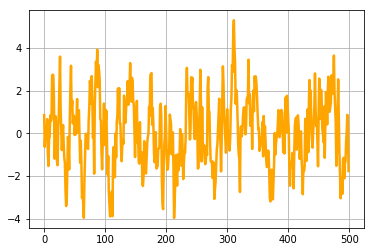

In [5]:
T = 500
phi = 0.75
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_phi75 = pd.Series(y)
y_phi75.plot(grid=True, color="orange", linewidth=2.5)

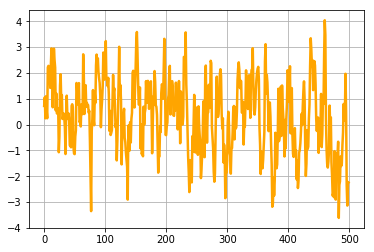

In [6]:
T = 500
phi = 0.8
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_phi80 = pd.Series(y)
y_phi80.plot(grid=True, color="orange", linewidth=2.5)

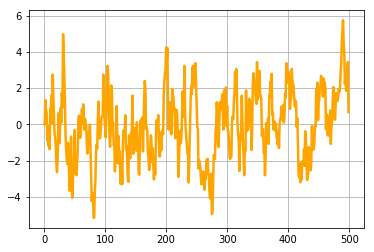

In [7]:
T = 500
phi = 0.9
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_phi90 = pd.Series(y)
y_phi90.plot(grid=True, color="orange", linewidth=2.5)

__Question1-3__

In [8]:
reg_phi25 = sm.OLS(y_phi25.values[1:], y_phi25[0:-1]).fit()

In [9]:
reg_phi50 = sm.OLS(y_phi50.values[1:], y_phi50[0:-1]).fit()

In [10]:
reg_phi75 = sm.OLS(y_phi75.values[1:], y_phi75[0:-1]).fit()

In [11]:
reg_phi80 = sm.OLS(y_phi80.values[1:], y_phi80[0:-1]).fit()

In [12]:
reg_phi90 = sm.OLS(y_phi90.values[1:], y_phi90[0:-1]).fit()

__Question1-4__

In [13]:
sig_01 = norm.ppf((1-(.01/2)))
print(sig_01)
sig_05 = norm.ppf((1-(.05/2)))
print(sig_05)
sig_10 = norm.ppf((1-(.1/2)))
print(sig_10)

2.5758293035489004
1.959963984540054
1.6448536269514722


In [14]:
print(reg_phi25.tvalues)
print(reg_phi25.bse)
print(reg_phi25.pvalues)

x1    5.436607
dtype: float64
x1    0.043538
dtype: float64
x1    8.519857e-08
dtype: float64


In [15]:
print(reg_phi50.tvalues)
print(reg_phi50.bse)
print(reg_phi50.pvalues)

x1    15.459527
dtype: float64
x1    0.036835
dtype: float64
x1    2.552685e-44
dtype: float64


In [16]:
print(reg_phi75.tvalues)
print(reg_phi75.bse)
print(reg_phi75.pvalues)

x1    26.137064
dtype: float64
x1    0.029123
dtype: float64
x1    1.896166e-95
dtype: float64


In [17]:
print(reg_phi80.tvalues)
print(reg_phi80.bse)
print(reg_phi80.pvalues)

x1    26.274644
dtype: float64
x1    0.029071
dtype: float64
x1    4.156699e-96
dtype: float64


In [36]:
print(reg_phi90.tvalues)
print(reg_phi90.bse)
print(reg_phi90.pvalues)

x1    33.093598
dtype: float64
x1    0.025057
dtype: float64
x1    7.582936e-128
dtype: float64


In [47]:
d = {'phi value': [0.25, ' ', ' ', 0.50, ' ', ' ', 0.75, ' ', ' ', 0.80, ' ', ' ', 0.90, ' ', ' '], 'Test Statistic': [reg_phi25.tvalues[0], ' ', ' ', \
reg_phi50.tvalues[0], ' ', ' ', reg_phi75.tvalues[0], ' ', ' ', reg_phi80.tvalues[0], ' ', ' ', reg_phi90.tvalues[0], ' ', ' '], 'Standard Error': \
[reg_phi25.bse[0], ' ', ' ', reg_phi50.bse[0], ' ', ' ', reg_phi75.bse[0], ' ', ' ', reg_phi80.bse[0], ' ', ' ', reg_phi90.bse[0], ' ', ' '], \
'Critical Values': [sig_01, sig_05, sig_10, sig_01, sig_05, sig_10, sig_01, sig_05, sig_10, sig_01, sig_05, sig_10, sig_01, sig_05, sig_10], \
'P-value': [reg_phi25.pvalues[0], ' ', ' ', reg_phi50.pvalues[0], ' ', ' ', reg_phi75.pvalues[0], ' ', ' ', reg_phi80.pvalues[0], ' ', ' ', \
reg_phi90.pvalues[0], ' ', ' '], 'Reject?': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', ]}
df = pd.DataFrame(data=d)
df

,phi value,Test Statistic,Standard Error,Critical Values,P-value,Reject?
0,0.25,5.43661,0.0435377,2.575829,8.51986e-08,Yes
1,,,,1.959964,,Yes
2,,,,1.644854,,Yes
3,0.5,15.4595,0.0368353,2.575829,2.55268e-44,Yes
4,,,,1.959964,,Yes
5,,,,1.644854,,Yes
6,0.75,26.1371,0.0291234,2.575829,1.89617e-95,Yes
7,,,,1.959964,,Yes
8,,,,1.644854,,Yes
9,0.8,26.2746,0.0290708,2.575829,4.1567e-96,Yes


__Question 1-5__

__Question 2__

In [50]:
T = 500
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
x = np.zeros(T)
x[0] = np.abs(np.random.normal())
u1 = np.random.normal(size=T)
u2 = np.random.normal(size=T)

for t in range(1,T):
    y[t] = y[t-1] + u1[t]
    x[t] = x[t-1] + u2[t]
    
y_series = pd.Series(y)
x_series = pd.Series(x)

In [52]:
p2_reg = sm.OLS(y_series.values, x_series).fit()

In [56]:
beta = p2_reg.params[0]
beta

0.0399851262108684

In [60]:
p2_tstat = p2_reg.tvalues[0]
p2_tstat

4.720078934195406

#### We reject the null hypothesis at each significance level.

In [61]:
n = 50000
z = np.zeros(n)
for i in range(n):
    T = 500
    y = np.zeros(T)
    y[0] = np.abs(np.random.normal())
    x = np.zeros(T)
    x[0] = np.abs(np.random.normal())
    u1 = np.random.normal(size=T)
    u2 = np.random.normal(size=T)

    for t in range(1,T):
        y[t] = y[t-1] + u1[t]
        x[t] = x[t-1] + u2[t]
    
    y_series = pd.Series(y)
    x_series = pd.Series(x)
    
    p2_reg = sm.OLS(y_series.values, x_series).fit()
    beta = p2_reg.params[0]
    
    z[i] = beta

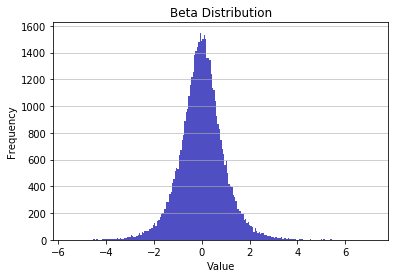

In [68]:
n, bins, patches = plt.hist(x=z, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Beta Distribution')
maxfreq = n.max()

__Problem 3__

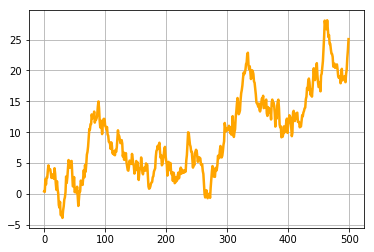

In [69]:
T = 500
phi = 1.0
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
a = np.random.normal(size=T)

for t in range(1,T):
    y[t] = phi * y[t-1] + a[t]
    
y_3 = pd.Series(y)
y_3.plot(grid=True, color="orange", linewidth=2.5)

In [70]:
reg_y = sm.OLS(y_3.values[1:], y_3[0:-1]).fit()

In [73]:
d = {'phi value': [1.0, ' ', ' '], 'Test Statistic': [reg_y.tvalues[0], ' ', ' '], 'Standard Error': [reg_y.bse[0], ' ', ' '], \
'Critical Values': [sig_01, sig_05, sig_10], 'P-value': [reg_y.pvalues[0], ' ', ' '], 'Reject?': ['Yes', 'Yes', 'Yes']}
df = pd.DataFrame(data=d)
df

,phi value,Test Statistic,Standard Error,Critical Values,P-value,Reject?
0,1,253.972,0.00394062,2.575829,0,Yes
1,,,,1.959964,,Yes
2,,,,1.644854,,Yes


__Question 4__

In [75]:
T = 500
x = np.zeros(T)
x[0] = np.abs(np.random.normal())
u1 = np.random.normal(size=T)
y = np.zeros(T)
y[0] = np.abs(np.random.normal())
alpha = 0.22
beta = 2.50
e = np.random.normal(size=T)

for t in range(1,T):
    x[t] = x[t-1] + u2[t]
    y[t] = alpha + beta * x[t] + e[t]
    
x_series = pd.Series(x)
y_series = pd.Series(y)

In [77]:
result_x = adfuller(x_series)
print('ADF Statistic: %f' % result_x[0])
print('p-value: %f' % result_x[1])
print('Critical Values:')
for key, value in result_x[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.828603
p-value: 0.366357
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570


In [78]:
result_y = adfuller(y_series)
print('ADF Statistic: %f' % result_y[0])
print('p-value: %f' % result_y[1])
print('Critical Values:')
for key, value in result_y[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.947064
p-value: 0.310255
Critical Values:
	1%: -3.444
	5%: -2.867
	10%: -2.570
